# Spectra acquisiton
Control both the stepping motor and the camera from this notebook.<br>
Make a loop to measure a wide-range spectrum automatically.

NOTE: only one connection to COM port is possible at a time. Shut down other connections, either in python or dedicated software.

In [2]:
%matplotlib inline 

In [3]:
import time, os, logging
from FLI import FLI
import numpy as np
import xarray as xr
from os.path import join
import datetime
import pandas as pd

In [4]:
%run thr640.py
%run imaging_tool.py

In [5]:
logger = logger
logger.setLevel(50) # 10 - DEBUG 50 - CRITICAL 20 - INFO
camera = FLI()
step_motor = THR640() # Can only have one instance.

In [6]:
basepath = r'\\10.249.254.51\Public\BACK_UP\wang\2024-12-11-JobinYvon-test'

if not os.path.exists(basepath):
    os.makedirs(basepath)

In [7]:
ccw_limit = 0
cw_limit = 1030000

# Single

In [10]:
def move_stepmotor(count): 
    step_motor.goto(count)
    step_motor.waitUntilReady()

def capture_image(exposure = 100, prefix = "image_Ar",basepath=basepath, count = 0,tag=""):
    """exposure - ms"""

    vbin = 1
    attributes = {
        "temperature": camera.getTemperature(),
        "device_status": camera.getDeviceStatus(),
        "exposure": exposure,
        "frame_type": "light",
    }
    camera.setExposureTime(exposure);camera.setVBin(vbin);camera.setImageArea(10,0,2058,512//vbin);camera.exposeFrame()
    time.sleep(.1)
    # load image
    image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
    # convert to xarray
    data = xr.DataArray(
        image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
    )
    # save data as NetCDF file
    filepath = join(basepath,f'{prefix}-{count}-{exposure}ms-{tag}.nc')
    print(filepath)
    data.to_netcdf(filepath)

    return image_data

In [11]:
# count=450000 # 615 nm
# count=740000 # 307.5 nm
# count=8000900 # 226 nm
# count=100000 # 840 nm
# count=666000 # Hdelta
# count=644000 # Hgamma
# count=595000 # Hbeta
# count=410500 # Halpha 411000
# count=
# count=700000
# count=213000 # OI
# count=175000

named_counts = {
    'halpha': 399000,
    'hbeta': 583000,
    'hgamma': 632000,
    'argon':630000
    # 'hdelta': 666000,
    # 'somebalmer':400000
    # 'argon':630000
}

In [12]:
#move_stepmotor(named_counts['argon'])

\\10.249.254.51\Public\BACK_UP\wang\2024-12-11-JobinYvon-test\0116ThAr-0-5000ms-your_comment.nc


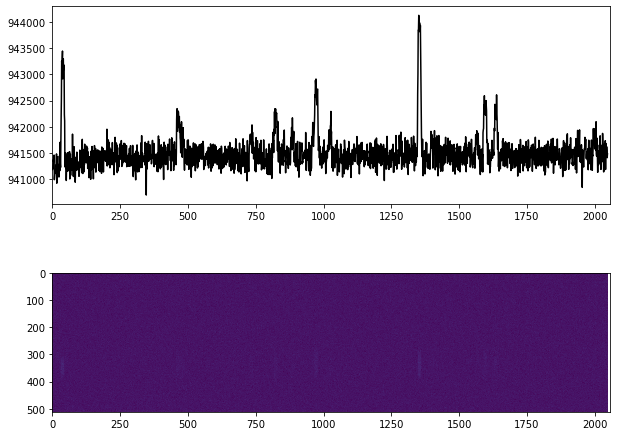

In [18]:
image_data = capture_image(5000, prefix="0116ThAr",basepath=basepath,tag='your_comment')
plot_image(image_data)